# Model 3: XGBoost / Gradient Boosting

**Goal:** Implement XGBoost to improve predictive performance over Decision Tree and Random Forest baselines.

**Key Steps:**
1. Load Data
2. Preprocessing (Encoding)
3. Train XGBoost Classifier
4. Evaluate Performance (Accuracy, ROC-AUC, F1-Score)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
# Load dataset
df = pd.read_csv('./data/credit_risk_dataset.csv')

# 1. Define Target Variable (y) BEFORE dropping columns
y = df['default_risk']

# 2. Drop specified columns from Features (X)
# Requirements: Drop ['default_risk', 'customer_financial_statement', 'customer_id', 'risk_category']
cols_to_drop = ['default_risk', 'customer_financial_statement', 'customer_id', 'risk_category']
X_raw = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Original shape: {df.shape}")
print(f"Features shape: {X_raw.shape}")

Original shape: (1500, 18)
Features shape: (1500, 15)


In [4]:
# 3. Encoding: One-Hot Encoding for categorical variables
# Identifying categorical columns (object type or specific known categoricals)
categorical_cols = X_raw.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical columns to Encode: {categorical_cols}")

# Use pd.get_dummies for One-Hot Encoding
X = pd.get_dummies(X_raw, columns=categorical_cols, drop_first=True)

# 4. Data Split: 80-20 Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")

Categorical columns to Encode: ['employment_type', 'education_level', 'marital_status', 'region', 'financial_stress_level']
Training Features Shape: (1200, 24)
Testing Features Shape: (300, 24)


In [5]:
# Initialize and Train XGBoost
# use_label_encoder=False is standard now, eval_metric='logloss' helps avoid warnings
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 5. Cross Validation: 5-fold CV
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"5-Fold CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Train on full training data
xgb_model.fit(X_train, y_train)

print("XGBoost Model Trained Successfully!")

c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:

5-Fold CV Accuracy Scores: [0.97083333 0.9625     0.96666667 0.95833333 0.97916667]
Mean CV Accuracy: 0.9675
XGBoost Model Trained Successfully!


c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.9633333333333334
ROC-AUC Score: 0.9951006292329123

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       191
           1       0.99      0.91      0.95       109

    accuracy                           0.96       300
   macro avg       0.97      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



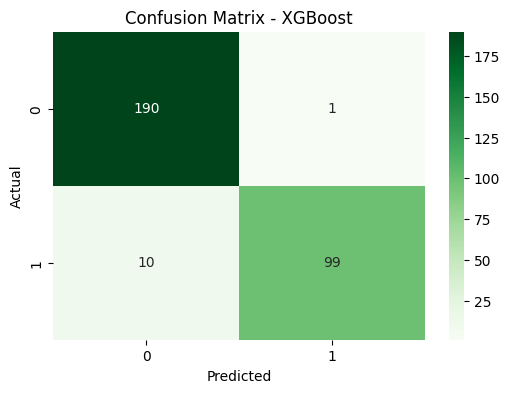

In [6]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\Iman Haikal\AppData\Local\Temp\ipykernel_15456\9291892.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


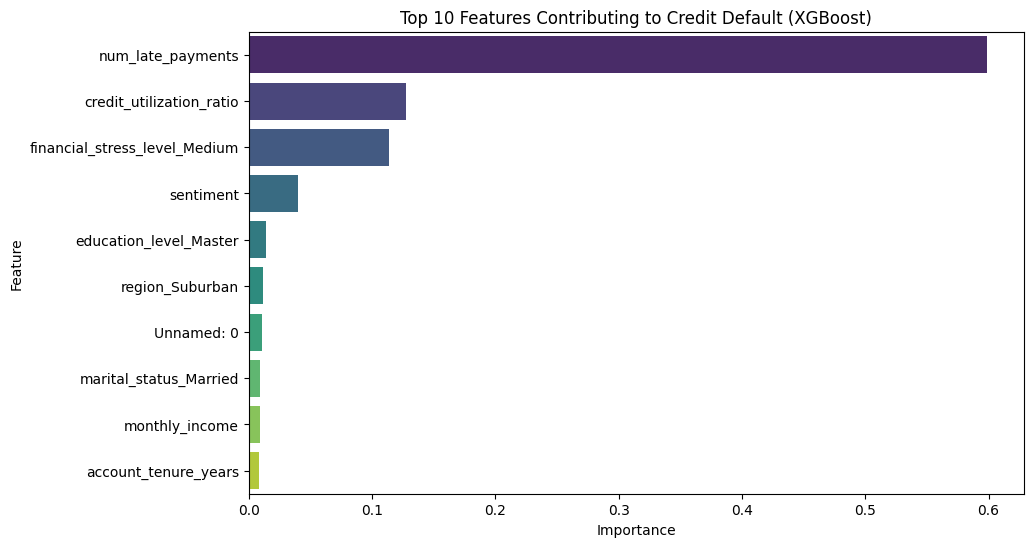

In [7]:
# Extract feature importance
importances = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Contributing to Credit Default (XGBoost)')
plt.show()

In [8]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

# 1. Setup Gemini (Reusing team's setup)
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

if not api_key:
    print("⚠️ Warning: GEMINI_API_KEY not found in .env file. AI interpretation skipped.")
else:
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel('gemini-3-flash-preview')

    # 2. Prepare the data for the AI
    # We convert our metrics and feature importance into a text string
    top_features = feature_importance_df.head(5).to_string(index=False)
    accuracy_val = accuracy_score(y_test, y_pred)
    roc_val = roc_auc_score(y_test, y_prob)
    
    analysis_prompt = f"""
    You are a Senior Data Scientist in a bank.
    I have trained an XGBoost model to predict credit default risk.
    
    Here are the performance metrics:
    - Accuracy: {accuracy_val:.2f}
    - ROC-AUC Score: {roc_val:.2f}
    
    Here are the top 5 most important features driving the model:
    {top_features}
    
    Task:
    1. Summarize the model's performance (is it good for a bank?).
    2. Interpret the top features. Explain WHY these specific features might be predicting default risk based on financial logic.
    3. Provide a brief business recommendation on how to use this model.
    """

    print("🤖 Asking Gemini to interpret the results...\n")
    
    try:
        response = model.generate_content(analysis_prompt)
        print("--- AI Analysis Report ---")
        print(response.text)
        
        # Optional: Save this analysis to a text file for the final report
        with open("model_interpretation_XGB.txt", "w") as f:
            f.write(response.text)
            
    except Exception as e:
        print(f"Error communicating with Gemini: {e}")

c:\Users\Iman Haikal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Iman Haikal\AppData\Local\Temp\ipykernel_15456\1529441210.py:2: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


🤖 Asking Gemini to interpret the results...

--- AI Analysis Report ---
Hello. As a Senior Data Scientist here at the bank, I have reviewed your XGBoost model results. While the initial numbers look impressive, we need to look under the hood with a critical, "banking-first" lens.

Here is my assessment:

### 1. Model Performance Summary: A "Too Good to Be True" Warning
On the surface, an **Accuracy of 0.96** and an **ROC-AUC of 1.00** appear world-class. However, in the context of credit risk, **an ROC-AUC of 1.00 is a major red flag.**

*   **The Risk of Data Leakage:** In real-world finance, predicting human behavior with 100% mathematical certainty is nearly impossible. A perfect AUC usually indicates "Data Leakage"—meaning the model is likely trained on a feature that "spoils" the answer. For example, if the `num_late_payments` feature includes data from *after* the default occurred, the model is simply looking at the result rather than predicting it.
*   **Suitability:** Currently